In [5]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mplc
from matplotlib.lines import Line2D
from matplotlib.colors import Normalize, LinearSegmentedColormap
from matplotlib.ticker import LogFormatter
from matplotlib.ticker import ScalarFormatter
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
%matplotlib inline
import seaborn as sns
import os
import random
import pyreadr
import csv

from scipy.stats import gaussian_kde
from sklearn.preprocessing import StandardScaler
from sklearn.cluster    import KMeans

from mpl_toolkits.basemap import Basemap

from scipy.stats import gaussian_kde, binned_statistic
from scipy.stats import skew, kurtosis


# import descartes
import geopandas as gpd
import geodatasets
from shapely.geometry import Point, Polygon
import shapely.geometry
from scipy.optimize import curve_fit
from sklearn.metrics import mean_absolute_error
import osmnx as ox
import pickle

import folium

from scipy.stats import gaussian_kde
from scipy.stats import binned_statistic
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score, mean_squared_error
from scipy.integrate import simps
from scipy import interpolate
import statsmodels.api as sm
import scipy.stats as stats

from meteostat import Point, Daily


%matplotlib inline

import networkx as nx
import collections

import rioxarray

import warnings
warnings.filterwarnings('ignore')


import os


# Define the power-law function
def power_law(x, a, b):
    return a * np.power(x, b)

# Define the linear function
def linear(x, a, b):
    return a + b * x

In [6]:
#STEP RESOLUTION DEGREES TO meters

from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):

    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371000 # Radius of earth in meters
    return c * r 

haversine(1,1,1.01,1)

1111.779911186028

# INFORMATION

In [7]:
net_type = 'drive'

In [8]:
T_type = 'mean'
# T_type = 'max'
# T_type = 'max_LST'

In [9]:
POPULATION = 'no'

In [10]:
PM = '25'

In [87]:
cluster_colors = {1:'purple', 2:'green', 3:'#0077b6'} 

# CITIES

In [12]:
cities = [
    'Barcelona', 'Montpellier', 'Rome', 'Naples', 'Porto', 'Sevilla', 'Alicante', 'Valencia', 'Bologna', 'Padua', 'Turin',
    'Madrid', 'Murcia', 'Genoa', 'Milan', 'Lisbon', 'Palma_de_Mallorca', 'Split','Marseille', 'Palermo','Nice', 'Malaga', 'Bari', 

    'Antwerp', 'Amsterdam', 'Brussels', 'London', 'Paris', 'Luxembourg', 'Rotterdam', 'Lille', 'Basel', 'Birmingham', 'Nantes', 'Strasbourg',
    'Zurich', 'Frankfurt', 'Vienna', 'Munich', 'Bratislava', 'Prague', 'Geneva', 'Bordeaux', 'Utrecht', 
    'Liege', 'Bilbao', 'Charleroi', 'Wroclaw', 'Leipzig', 'Berlin', 'Hamburg', 'Lodz', 'Warsaw', 'Edinburgh', 
    'Glasgow', 'Cologne', 'Dusseldorf', 'Newcastle', 'Ghent', 'Dublin', 'Toulouse', 'Leeds', 'Lyon',

    'Tallinn','Reykjavik', 'Copenhagen', 'Goteborg', 'Helsinki', 'Stockholm', 'Oslo', 'Tartu', 'Riga', 'Klaipeda', 'Vilnius', 'Gdansk',

    'Sofia', 'Zagreb', 'Budapest', 'Szeged', 'Brasov', 'Bucharest', 'Ljubljana', 'Sarajevo', 'Gyor','Thessaloniki','Debrecen','Belgrado', 'Podgorica',
    'Trieste', 'Miskolc', 'Kosice', 'Krakow', 'Pecs', 'Varna', 'Skopje', 'Novi_Sad', 'Graz', 'Athens', 'Tirana', 'Cluj_Napoca', 
    
    'Accra', 'Addis_Abeba', 'Amman', 'Auckland', 'Bogota', 'Buenos_Aires', 'Cairo', 'Cape_Town', 'Chennai', 'Curitiba', 'Dakar', 'Dhaka', 'Dubai', 
    'Ho_Chi_Minh', 'Hong_Kong', 'Houston', 'Islamabad', 'Istanbul', 'Jakarta', 'Karachi', 'Lagos', 'Lima', 'Los_Angeles', 'Marrakesh', 'Medina', 
    'Melbourne', 'Mexico_City', 'Mogadishu', 'Moscow', 'Nairobi', 'Nanjing', 'New_York', 'Phoenix', 'Rabat', 'Salvador', 'Santiago', 'Singapore', 
    'Sydney', 'Teheran', 'Tokyo', 'Toronto', 'Tschwane']

In [13]:
len(cities)

142

# PLOT COLORS

In [14]:
colormap = plt.cm.Paired  
colors = [colormap(i) for i in np.linspace(0, 1,len(cities))]

# OPEN STREET NETWORK, POPULATION AND TEMPERATURE (binning)

In [15]:
size = '1000'
SIZE = 1000
cell_size_meters = 1000

In [16]:
# OPEN MERGE T AND POPULATION CSV FILES

os.chdir(r'C:\Users\mduran\Desktop\PhD- Patterns and Dynamics in Urban Networks\1- DATA POLLUTION - Scaling laws, pdfs\RESULTS_GLOBAL\dataframes_2') 

pop_T_NETWORK_dic = {}

for city in cities:
    
    pop_T_NETWORK_dic[city] = pd.read_csv(city+'_pop_T'+T_type+'_PM'+PM+'_NETWORK_'+size+'.csv')

    if 'population' in pop_T_NETWORK_dic[city].columns:
            pop_T_NETWORK_dic[city].rename(columns={'population': 'popu'}, inplace=True)


In [17]:
for city in cities:

    pop_T_NETWORK_dic[city].replace([np.inf, -np.inf], np.nan, inplace=True)

    pop_T_NETWORK_dic[city] = pop_T_NETWORK_dic[city].dropna(subset=['T']).reset_index(drop=True) # specific column
    pop_T_NETWORK_dic[city] = pop_T_NETWORK_dic[city].dropna(subset=['node']).reset_index(drop=True)
    pop_T_NETWORK_dic[city] = pop_T_NETWORK_dic[city].dropna(subset=['PM'+PM]).reset_index(drop=True)


if POPULATION == 'yes':
    for city in cities:
        pop_T_NETWORK_dic[city] = pop_T_NETWORK_dic[city][pop_T_NETWORK_dic[city]['popu'] > 0] # avoid prblems when applying logn and logp --> represent 2-3% of the data points

# OPEN RURAL TEMPERATURE and PM

In [18]:
# OPEN MERGE T AND POPULATION CSV FILES

os.chdir(r'C:\Users\mduran\Desktop\PhD- Patterns and Dynamics in Urban Networks\1- DATA POLLUTION - Scaling laws, pdfs\RESULTS_GLOBAL\dataframes_2') 

OUTSIDE_TEMP_dic = {}

for city in cities:

    OUTSIDE_TEMP_dic[city] = pd.read_csv(city+'_pop_T'+T_type+'_PM'+PM+'_NETWORK_1000.csv')

    OUTSIDE_TEMP_dic[city].replace([np.inf, -np.inf], np.nan, inplace=True)
    OUTSIDE_TEMP_dic[city] = OUTSIDE_TEMP_dic[city].dropna(subset=['T']).reset_index(drop=True)
    OUTSIDE_TEMP_dic[city] = OUTSIDE_TEMP_dic[city][OUTSIDE_TEMP_dic[city]['node'] == 1]
    

In [19]:
# OPEN MERGE T AND POPULATION CSV FILES

os.chdir(r'C:\Users\mduran\Desktop\PhD- Patterns and Dynamics in Urban Networks\1- DATA POLLUTION - Scaling laws, pdfs\RESULTS_GLOBAL\dataframes_2') 

OUTSIDE_PM_dic = {}

for city in cities:

    OUTSIDE_PM_dic[city] = pd.read_csv(city+'_pop_T'+T_type+'_PM'+PM+'_NETWORK_1000.csv')

    OUTSIDE_PM_dic[city].replace([np.inf, -np.inf], np.nan, inplace=True)
    OUTSIDE_PM_dic[city] = OUTSIDE_PM_dic[city].dropna(subset=['PM'+PM]).reset_index(drop=True)
    OUTSIDE_PM_dic[city] = OUTSIDE_PM_dic[city][OUTSIDE_PM_dic[city]['node'].isna()]

# deltaT and deltaPM CALCULATION

In [20]:
for city in cities:
    pop_T_NETWORK_dic[city]['deltaT'] = pop_T_NETWORK_dic[city]['T'] - OUTSIDE_TEMP_dic[city]['T'].mean()

In [21]:
for city in cities:
    pop_T_NETWORK_dic[city]['deltaPM'+PM] = pop_T_NETWORK_dic[city]['PM'+PM] - OUTSIDE_PM_dic[city]['PM'+PM].mean()

# OPEN LOG LINEAR FIT MODEL PARAMETERS

In [22]:
# REAL DATA

for city in cities:

    pop_T_NETWORK_dic[city]['logpopu'] = np.log(pop_T_NETWORK_dic[city]['popu']) 
    pop_T_NETWORK_dic[city]['lognode'] = np.log(pop_T_NETWORK_dic[city]['node']) 

## STREET NETWORK

In [23]:
os.chdir(r'C:\Users\mduran\Desktop\PhD- Patterns and Dynamics in Urban Networks\1- DATA POLLUTION - Scaling laws, pdfs\RESULTS_GLOBAL\dataframes_2') 

coefficients_T_dic = {}
coefficients_PM_dic = {}

for city in cities:
    
    coefficients_T_dic[city] = pd.read_csv(city+'_coefficients_logn_deltaT_'+T_type+'_'+size+'.csv')  
    coefficients_PM_dic[city] = pd.read_csv(city+'_coefficients_logn_PM'+PM+'_'+size+'.csv') 

os.chdir(r'C:\Users\mduran\Desktop\PhD- Patterns and Dynamics in Urban Networks\1- DATA POLLUTION - Scaling laws, pdfs\RESULTS_GLOBAL')

In [24]:
BETAs_node = []
ALPHAs_node = []
R2s_node = []

for city in cities:
    BETAs_node.append(coefficients_PM_dic[city]['slope'][0])
    ALPHAs_node.append(coefficients_PM_dic[city]['intersection'][0])
    R2s_node.append(coefficients_PM_dic[city]['R2'][0])

In [25]:
BETAs_node_T = []
ALPHAs_node_T = []
R2s_node_T = []

for city in cities:
    BETAs_node_T.append(coefficients_T_dic[city]['slope'][0])
    ALPHAs_node_T.append(coefficients_T_dic[city]['intersection'][0])
    R2s_node_T.append(coefficients_T_dic[city]['R2'][0])

In [26]:
std_residuals_dic = {}
std_RESIDUALS_node = []
std_logn_dic = {}

for city in cities:
    
    T_predicted = coefficients_PM_dic[city]['intersection'][0] + coefficients_PM_dic[city]['slope'][0] * pop_T_NETWORK_dic[city]['lognode']
    residuals = pop_T_NETWORK_dic[city]['PM'+PM] - T_predicted
    
    std_residuals_dic[city] = np.std(residuals)
    std_RESIDUALS_node.append(np.std(residuals))
    
    std_logn_dic[city] = np.sqrt(coefficients_PM_dic[city]['slope'][0]**2*pop_T_NETWORK_dic[city]['lognode'].std()**2 + std_residuals_dic[city]**2)
    # print(city)
    # print(coefficients_dic[city]['slope'][0]*pop_T_NETWORK_dic[city]['lognode'].std())
    # print(np.sqrt(np.mean(BETAs_node)**2*pop_T_NETWORK_dic[city]['lognode'].std()**2 + np.mean(std_residuals_node)**2 ))
    # print(std_logn_dic[city])
    # print(pop_T_NETWORK_dic[city]['T'].std())

In [27]:
ratios_residual = []
ratios_no_residual = []

for city in cities:
    ratios_residual.append(std_logn_dic[city]/pop_T_NETWORK_dic[city]['PM'+PM].std())
    ratios_no_residual.append(pop_T_NETWORK_dic[city]['lognode'].std()/pop_T_NETWORK_dic[city]['PM'+PM].std())

In [28]:
std_residuals_dic_T = {}
std_RESIDUALS_node_T = []
# std_logn_dic = {}

for city in cities:
    
    T_predicted = coefficients_T_dic[city]['intersection'][0] + coefficients_T_dic[city]['slope'][0] * pop_T_NETWORK_dic[city]['lognode']
    residuals = pop_T_NETWORK_dic[city]['T'] - T_predicted
    
    std_residuals_dic_T[city] = np.std(residuals)
    std_RESIDUALS_node_T.append(np.std(residuals))

## POPULATION

In [29]:

os.chdir(r'C:\Users\mduran\Desktop\PhD- Patterns and Dynamics in Urban Networks\1- DATA POLLUTION - Scaling laws, pdfs\RESULTS_GLOBAL\dataframes_2')

coefficients_p_PM_dic = {}
coefficients_p_T_dic = {}

for city in cities:

    coefficients_p_T_dic[city] = pd.read_csv(city+'_coefficients_logp_deltaT_'+T_type+'_'+size+'.csv')  
    coefficients_p_PM_dic[city] = pd.read_csv(city+'_coefficients_logp_PM'+PM+'_'+size+'.csv') 

os.chdir(r'C:\Users\mduran\Desktop\PhD- Patterns and Dynamics in Urban Networks\1- DATA POLLUTION - Scaling laws, pdfs\RESULTS_GLOBAL')

In [30]:

BETAs_popu = []
ALPHAs_popu = []
R2s_popu = []

for city in cities:
    BETAs_popu.append(coefficients_p_PM_dic[city]['slope'][0])
    ALPHAs_popu.append(coefficients_p_PM_dic[city]['intersection'][0])
    R2s_popu.append(coefficients_p_PM_dic[city]['R2'][0])

In [31]:

BETAs_popu_T = []
ALPHAs_popu_T = []
R2s_popu_T = []

for city in cities:
    BETAs_popu_T.append(coefficients_p_T_dic[city]['slope'][0])
    ALPHAs_popu_T.append(coefficients_p_T_dic[city]['intersection'][0])
    R2s_popu_T.append(coefficients_p_T_dic[city]['R2'][0])

In [32]:

std_residuals_dic = {}
std_RESIDUALS_popu = []
std_logp_dic = {}

for city in cities:
    
    T_predicted = coefficients_p_PM_dic[city]['intersection'][0] + coefficients_p_PM_dic[city]['slope'][0] * pop_T_NETWORK_dic[city]['logpopu']
    residuals = pop_T_NETWORK_dic[city]['T'] - T_predicted
    
    std_residuals_dic[city] = np.std(residuals)
    std_RESIDUALS_popu.append(np.std(residuals))
    
    std_logp_dic[city] = np.sqrt(coefficients_p_PM_dic[city]['slope'][0]**2*pop_T_NETWORK_dic[city]['logpopu'].std()**2 + std_residuals_dic[city]**2)
    # print(city)
    # print(coefficients_dic[city]['slope'][0]*pop_T_NETWORK_dic[city]['lognode'].std())
    # print(np.sqrt(np.mean(BETAs_node)**2*pop_T_NETWORK_dic[city]['lognode'].std()**2 + np.mean(std_residuals_node)**2 ))
    # print(std_logn_dic[city])
    # print(pop_T_NETWORK_dic[city]['T'].std())

In [33]:

ratios_residual = []
ratios_no_residual = []

for city in cities:
    ratios_residual.append(std_logp_dic[city]/pop_T_NETWORK_dic[city]['T'].std())
    ratios_no_residual.append(pop_T_NETWORK_dic[city]['logpopu'].std()/pop_T_NETWORK_dic[city]['T'].std())

# (x_peak,y_peak) TEMPERATURE DISTRIBUTIONS

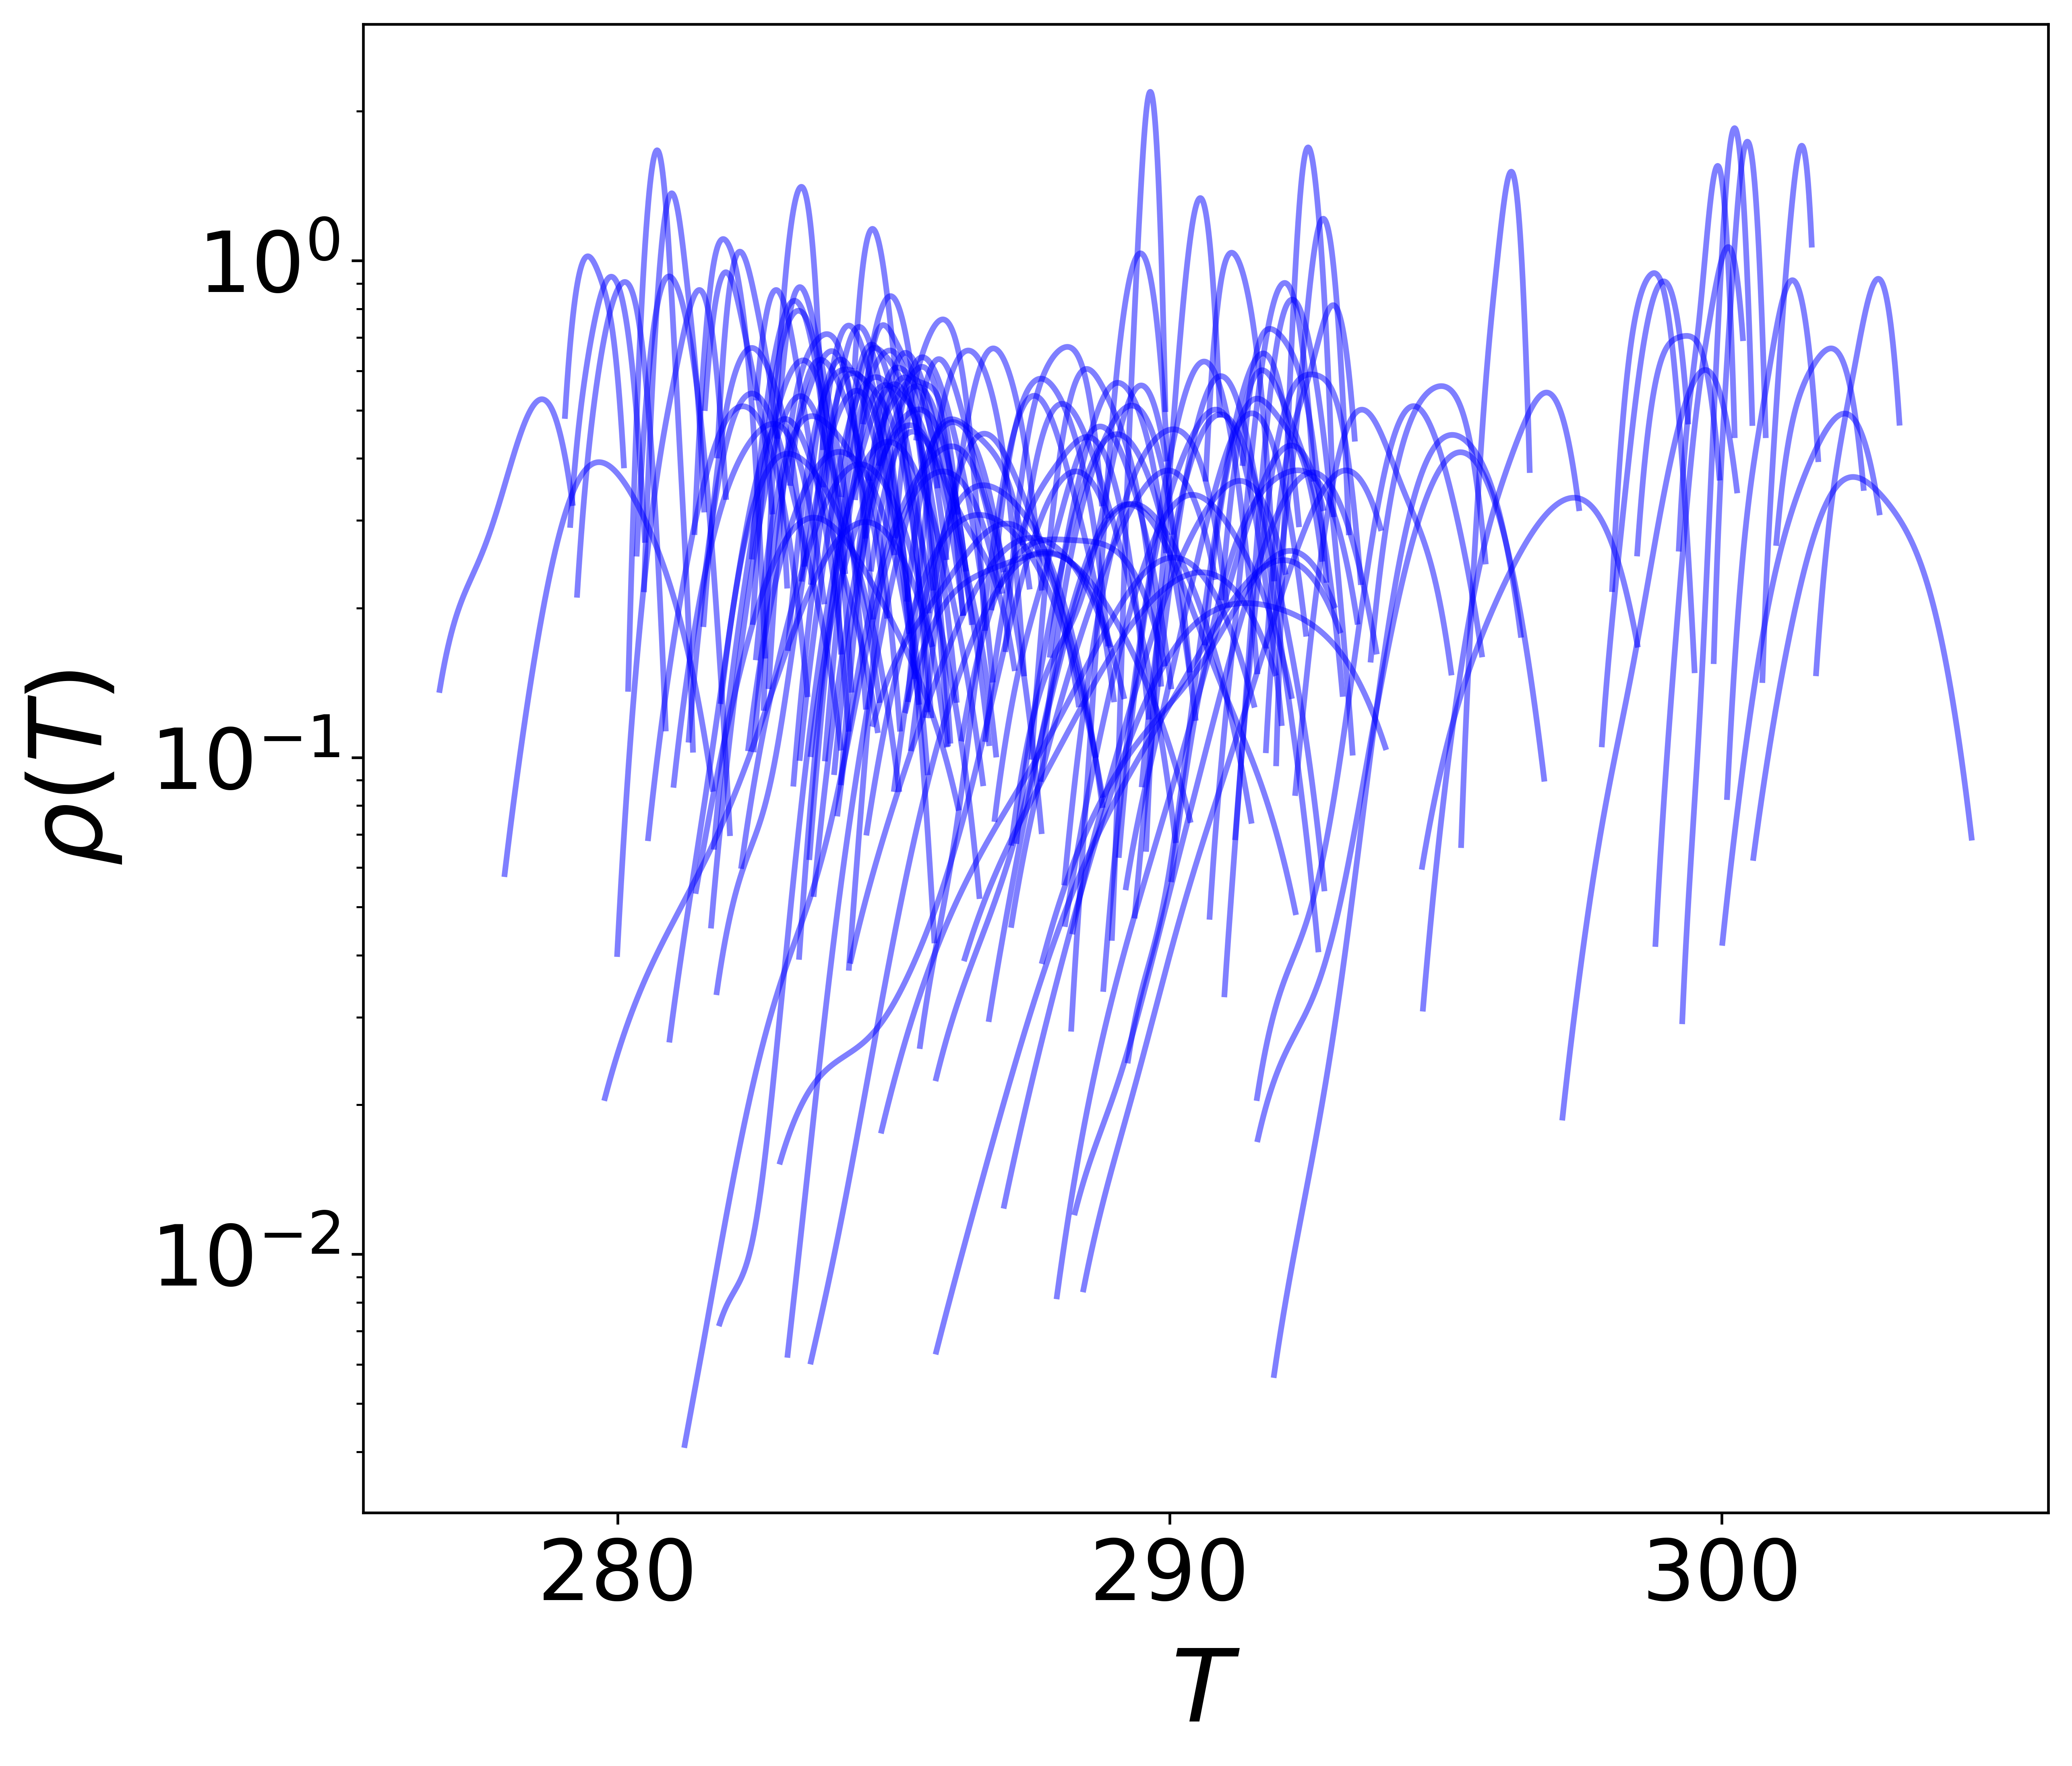

In [34]:
def automate_pdf_plotting( pop_T_NETWORK_dic, bw_method=0.75, step=0.005, lower_pct=1, upper_pct=100):

    kde_dic = {}
    y_kde_dic = {}
    TEMP_points_dic = {}
    
    for city in cities:

        T_data = np.array(pop_T_NETWORK_dic[city]['T'])
        
        # --- 1) remove tails ---
        low_val = np.percentile(T_data, lower_pct)
        high_val = np.percentile(T_data, upper_pct)
        T_data_clipped = T_data[(T_data >= low_val) & (T_data <= high_val)]

        if len(T_data_clipped) < 2:
            T_data_clipped = T_data

        # --- 2) Compute Gaussian KDE ---
        kde = gaussian_kde(T_data_clipped, bw_method=bw_method)
        kde_dic[city] = kde

        temp_min, temp_max = T_data_clipped.min(), T_data_clipped.max()
        if temp_min == temp_max:
            temp_min -= 1
            temp_max += 1

        bins = int((temp_max - temp_min) / step) if temp_max > temp_min else 50
        bins = max(bins, 50)
        TEMP_points = np.linspace(temp_min, temp_max, bins)
        TEMP_points_dic[city] = TEMP_points
        
        y_kde = kde(TEMP_points)
        y_kde_dic[city] = y_kde
        continue
    
    # --- 3) Plotting ---
    fig, ax = plt.subplots(figsize=(9, 8), dpi=600)
    
    for city in cities:
        if city in TEMP_points_dic and city in y_kde_dic:
            ax.plot(
                TEMP_points_dic[city], 
                y_kde_dic[city], 
                color='blue', 
                alpha=0.5, 
                linewidth=1.7, 
                markersize=1.5, 
                label=city
            )

    ax.set_ylabel(r'$\rho(T)$', size=30, labelpad=8)
    ax.set_xlabel(r'$T$', size=30, labelpad=8)
    ax.set_yscale('log', base=10)

    plt.xticks([280, 290, 300]) 
    plt.tick_params(axis='x', labelsize=25) 
    plt.tick_params(axis='y', labelsize=25)

    # (Optional) legend, saving, etc.
    # plt.savefig('T'+T_type+ '_pdf_clusters_'+size+'.svg', format='svg', dpi=600, bbox_inches='tight')

    plt.show()
    return y_kde_dic

y_kde_dic = automate_pdf_plotting(pop_T_NETWORK_dic, bw_method=0.65, step=0.005)

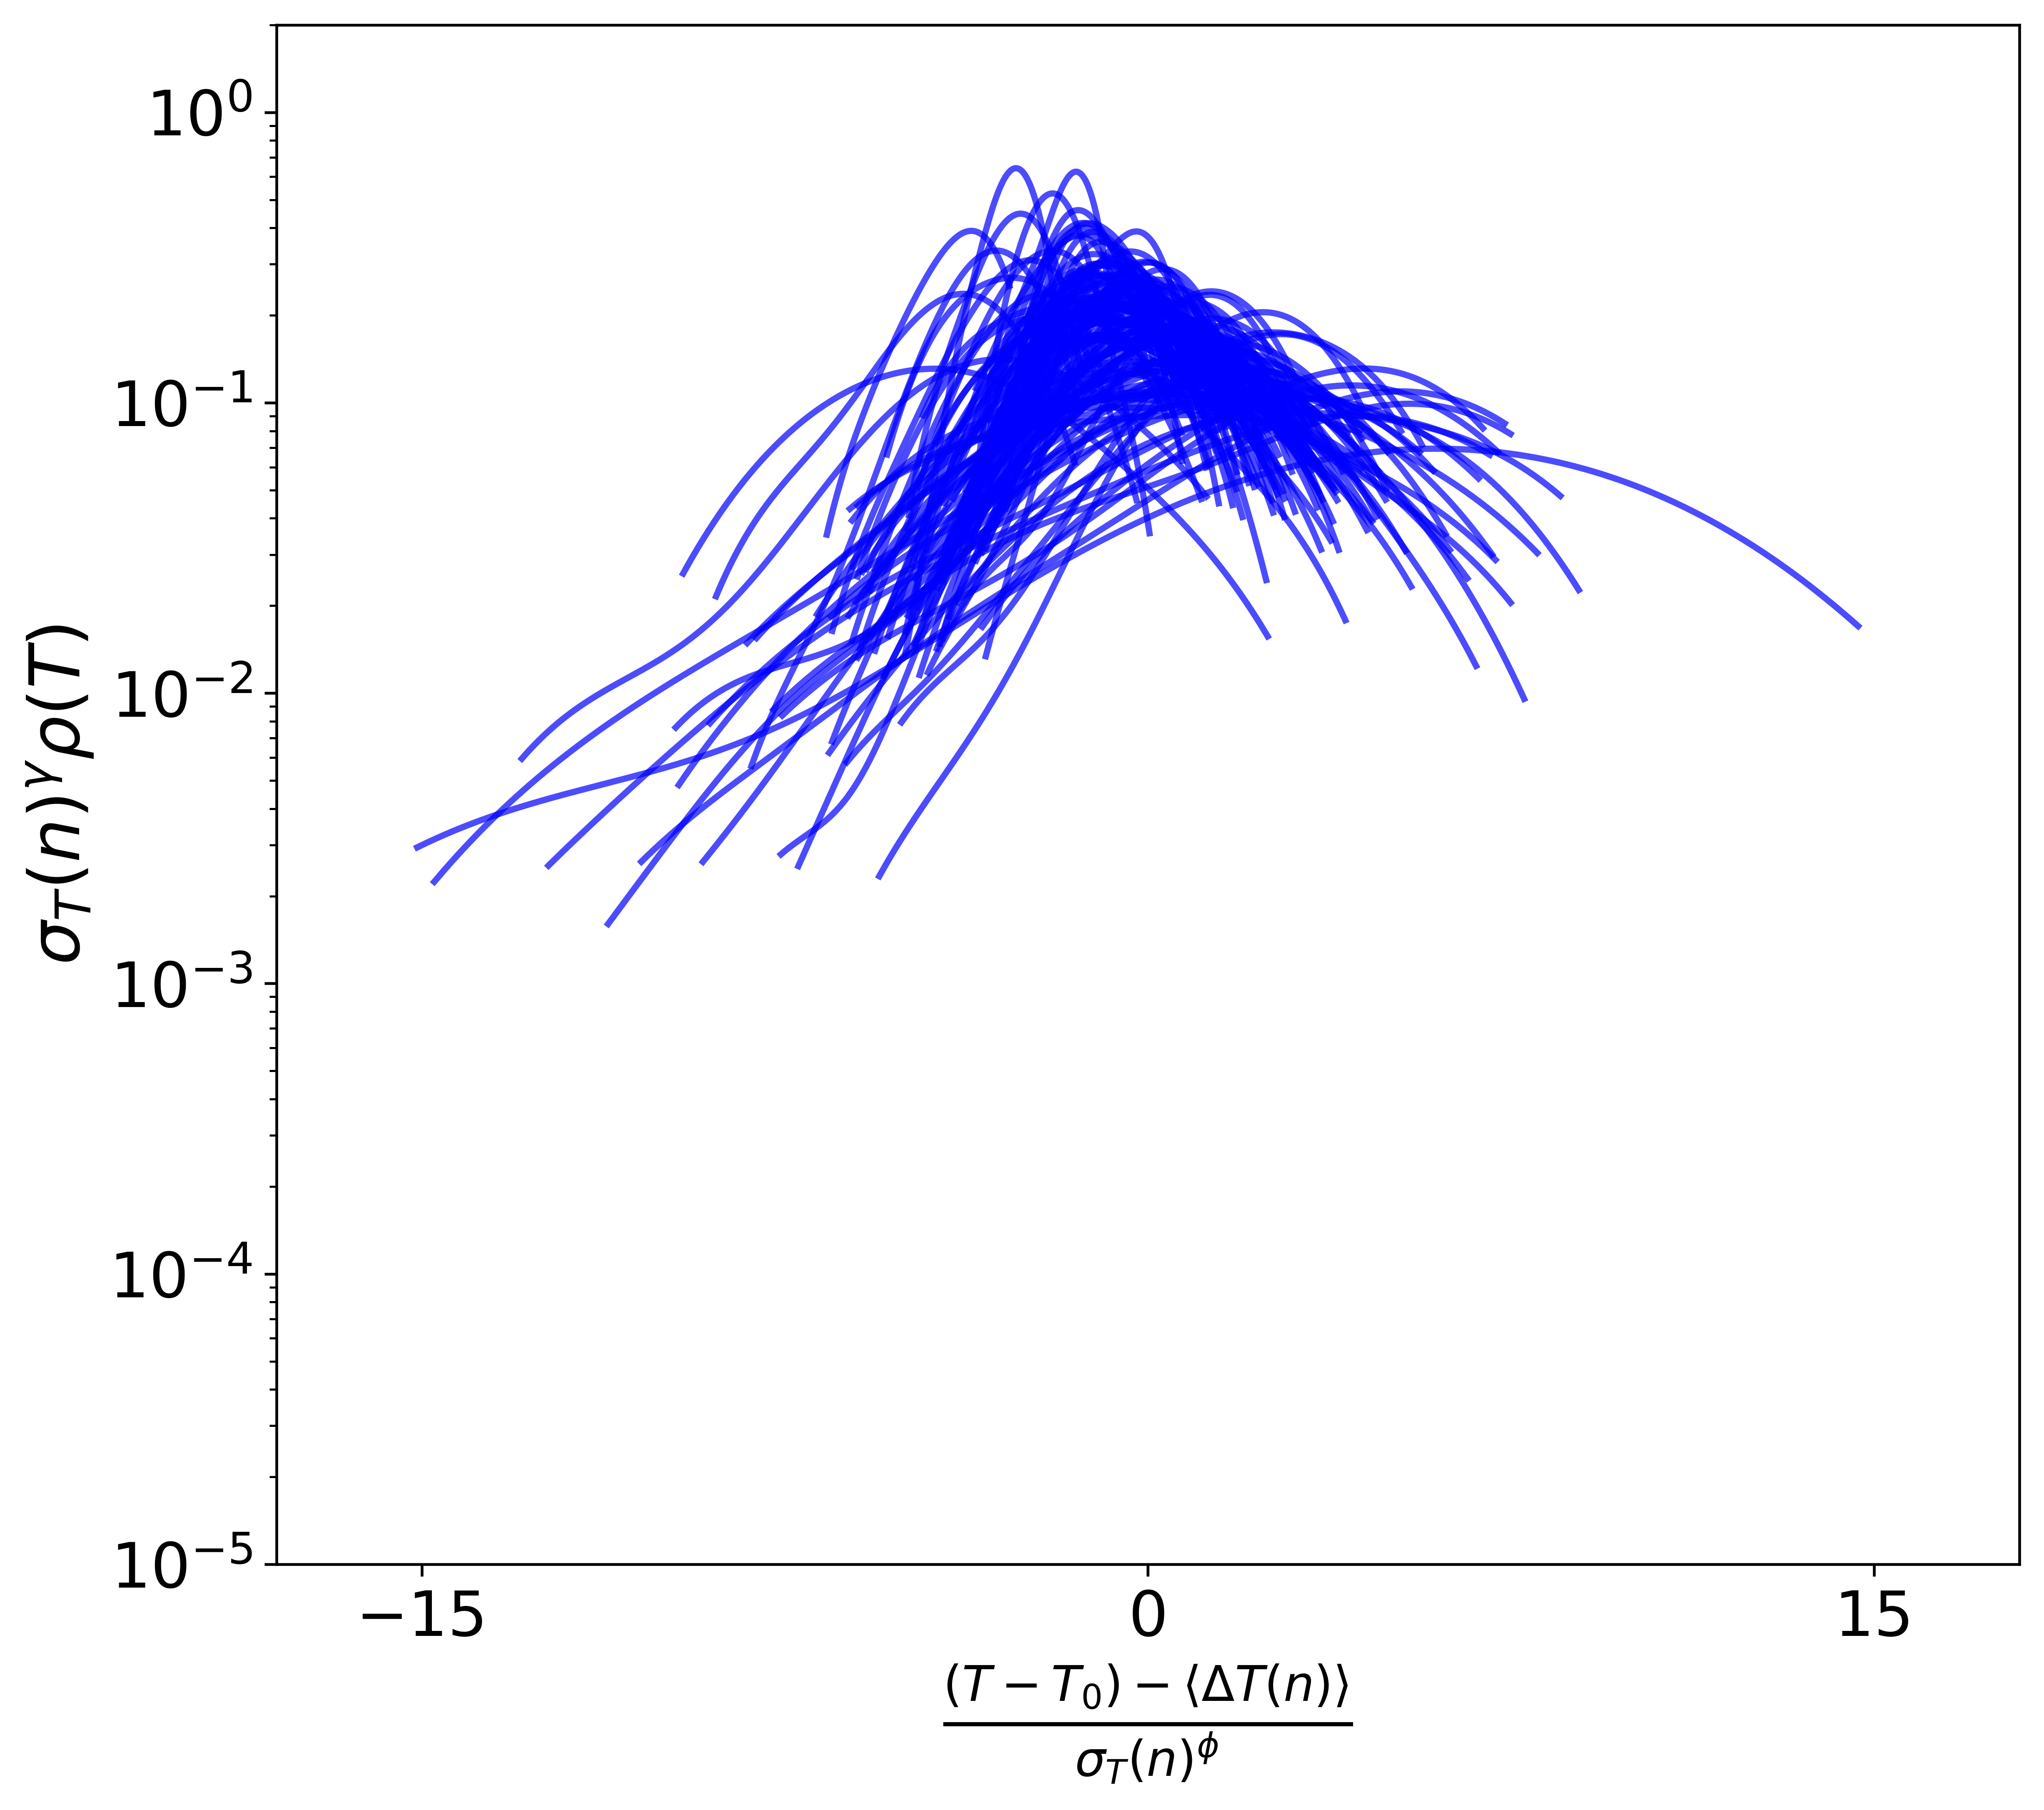

In [35]:
# NO CLUSTERING

def automate_pdf_plotting_normalized(
    pop_T_NETWORK_dic, OUTSIDE_TEMP_dic, b=1, bw_method=0.5, step=0.005,
    lower_pct=1, upper_pct=100):
    
    Y_kde_dic = {}
    X_kde_dic = {}

    phi = b

    for city in cities:
        T_data = np.array(pop_T_NETWORK_dic[city]['T'])

        # --- 1) remove outliers ---
        low_val = np.percentile(T_data, lower_pct)
        high_val = np.percentile(T_data, upper_pct)
        T_data_clipped = T_data[(T_data >= low_val) & (T_data <= high_val)]

        # --- 2) Compute KDE ---
        kde = gaussian_kde(T_data_clipped, bw_method=bw_method)

        temp_min, temp_max = T_data_clipped.min(), T_data_clipped.max()
        if temp_min == temp_max:  # fallback if data is all the same
            temp_min -= 1
            temp_max += 1
        bins = int((temp_max - temp_min) / step) if temp_max > temp_min else 50
        bins = max(bins, 50)  # ensure at least 50 points
        TEMP_points = np.linspace(temp_min, temp_max, bins)
        
        y_kde = kde(TEMP_points)

        # --- 3) rescaling X & Y---
        T_outside_mean = OUTSIDE_TEMP_dic[city]['T'].mean()
        T_predicted = np.mean(ALPHAs_node_T) + np.mean(BETAs_node_T) * pop_T_NETWORK_dic[city]['lognode'].mean()
        
        scaling_factor_X = (np.sqrt(np.mean(BETAs_node_T)**2 * pop_T_NETWORK_dic[city]['lognode'].std()**2) ) ** phi 
        X_normalized = (TEMP_points - T_outside_mean - T_predicted) / scaling_factor_X

        scaling_factor_Y = scaling_factor_X
        y_kde_normalized = y_kde * scaling_factor_Y
        
        Y_kde_dic[city] = y_kde_normalized
        X_kde_dic[city] = X_normalized

    # --- 4) plot ---
    fig, ax = plt.subplots(figsize=(9, 8), dpi=600)
    
    for city in cities:
        if city in X_kde_dic and city in Y_kde_dic:
            ax.plot(X_kde_dic[city], Y_kde_dic[city], color='blue', alpha=0.7, linewidth=1.8, label=city)
    
    ax.set_ylabel(r'$ \sigma_{T}(n)^{\gamma} \rho(T)$', size=20)
    ax.set_xlabel(r'$\frac{(T - T_0) -  \langle \Delta T(n) \rangle}{\sigma_{T}(n)^{\phi}}$', size=20)
    ax.set_yscale('log', base=10)

    plt.tick_params(axis='x', labelsize=18) 
    plt.tick_params(axis='y', labelsize=18) 

    plt.xlim(-18, 18)
    plt.xticks([-15,0,15])
    plt.ylim(1e-5, 2)
    # plt.savefig('T'+T_type+'_pdf_normalized_node_no_groups_'+size+'.svg', format='svg', dpi=600, bbox_inches='tight')
    
    plt.show()

    return X_kde_dic, Y_kde_dic

X_kde_dic, Y_kde_dic = automate_pdf_plotting_normalized(pop_T_NETWORK_dic, OUTSIDE_TEMP_dic, b=1, bw_method=0.7, step=0.01)

# k means CLUSTERING

SSE: 99.44730795680131
Cluster 1: 35 cities
Cluster 2: 90 cities
Cluster 3: 17 cities


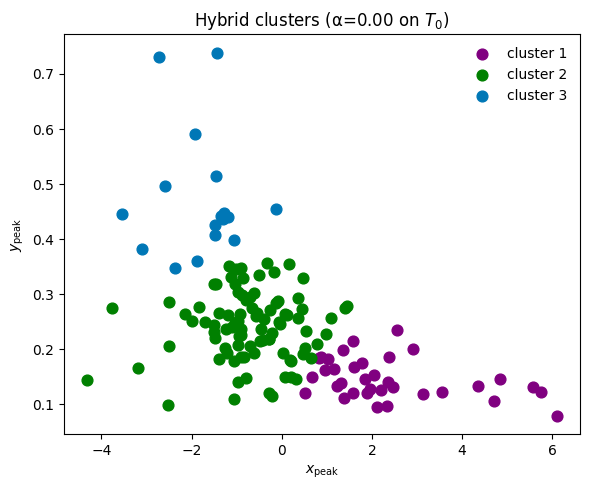

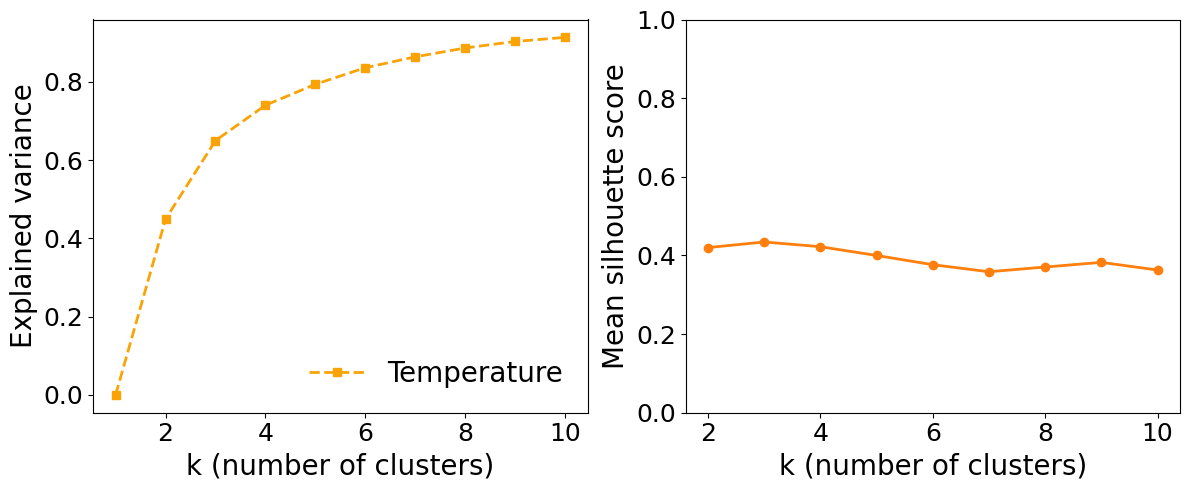

In [36]:
# DATA COLLAPSE SHAPE + rural climate

# -----------------------------------------------------------------------------
# 0) Initialize dictionaries to hold normalized KDE data
# -----------------------------------------------------------------------------
Y_kde_dic = {}
X_kde_dic = {}

step       = 0.01
bw_method  = 0.5
phi        = 1
lower_pct  = 1
upper_pct  = 100

for city in cities:
    T_data = np.array(pop_T_NETWORK_dic[city]['T'])
    low_val, high_val = np.percentile(T_data, [lower_pct, upper_pct])
    T_data_clipped = T_data[(T_data >= low_val) & (T_data <= high_val)]

    kde = gaussian_kde(T_data_clipped, bw_method=bw_method)
    temp_min, temp_max = T_data_clipped.min(), T_data_clipped.max()
    if temp_min == temp_max:
        temp_min -= 1; temp_max += 1
    bins = max(int((temp_max - temp_min)/step), 50)
    X_pts = np.linspace(temp_min, temp_max, bins)
    Y_vals = kde(X_pts)

    T0_mean    = OUTSIDE_TEMP_dic[city]['T'].mean()
    T_pred     = np.mean(ALPHAs_node_T) + np.mean(BETAs_node_T)*pop_T_NETWORK_dic[city]['lognode'].mean()
    scale_X    = (np.sqrt(np.mean(BETAs_node_T)**2 * pop_T_NETWORK_dic[city]['lognode'].std()**2))**phi
    X_norm     = (X_pts - T0_mean - T_pred) / scale_X
    Y_norm     = Y_vals * scale_X

    X_kde_dic[city] = X_norm
    Y_kde_dic[city] = Y_norm

# -----------------------------------------------------------------------------
# 1) Extract peaks
# -----------------------------------------------------------------------------
cities_all = list(X_kde_dic.keys())
n_all      = len(cities_all)
peaks      = np.zeros((n_all, 2))

for i, city in enumerate(cities_all):
    x_arr, y_arr = X_kde_dic[city], Y_kde_dic[city]
    j = np.argmax(y_arr)
    peaks[i] = x_arr[j], y_arr[j]

# -----------------------------------------------------------------------------
# 2) Rural T0
# -----------------------------------------------------------------------------
T0 = np.full(n_all, np.nan)
for i, city in enumerate(cities_all):
    df0 = OUTSIDE_TEMP_dic.get(city)
    if df0 is not None and not df0['T'].dropna().empty:
        T0[i] = df0['T'].dropna().mean()

mask   = ~np.isnan(T0)
cities = [c for c,m in zip(cities_all, mask) if m]
peaks  = peaks[mask]
T0     = T0[mask]

# -----------------------------------------------------------------------------
# 3) Standardize & blend
# -----------------------------------------------------------------------------
shape_part = StandardScaler().fit_transform(peaks)
temp_part  = StandardScaler().fit_transform(T0.reshape(-1,1))
alpha      = 0. # 0.3 → 30% weight on T0, 70% on shape
features   = np.hstack([ (1-alpha)*shape_part, alpha*temp_part ])

# -----------------------------------------------------------------------------
# 4) K-means & initial labels
# -----------------------------------------------------------------------------
km       = KMeans(n_clusters=3, random_state=0, n_init=50)
labels0  = km.fit_predict(features)      # 0,1,2
print("SSE:", km.inertia_)
labels1  = labels0 + 1                   # shift to 1,2,3

# -----------------------------------------------------------------------------
# 5) Re-order labels by ascending mean y_peak
# -----------------------------------------------------------------------------
mean_y = {lab: peaks[labels1==lab,1].mean() for lab in np.unique(labels1)}
sorted_labs = sorted(mean_y, key=lambda L: mean_y[L])
relabel_map = {old:new for new,old in enumerate(sorted_labs, start=1)}
labels = np.array([relabel_map[L] for L in labels1])

# -----------------------------------------------------------------------------
# 6) Build clusters dict
# -----------------------------------------------------------------------------
clusters = {k: [] for k in (1,2,3)}
for city, lab in zip(cities, labels):
    clusters[lab].append(city)
for k in clusters:
    print(f"Cluster {k}: {len(clusters[k])} cities")

# -----------------------------------------------------------------------------
# 7) Plot with purple=low, green=mid, blue=high
# -----------------------------------------------------------------------------
color_map = {1:'purple', 2:'green', 3:'#0077b6'}
fig, ax = plt.subplots(figsize=(6,5))
for k in (1,2,3):
    idx = labels==k
    ax.scatter(peaks[idx,0], peaks[idx,1],
               s=60, color=color_map[k],
               label=f'cluster {k}')
ax.set_xlabel(r'$x_{\rm peak}$'); ax.set_ylabel(r'$y_{\rm peak}$')
ax.set_title(f'Hybrid clusters (α={alpha:.2f} on $T_0$)')
ax.legend(frameon=False)
plt.tight_layout()
plt.show()

from sklearn.metrics import silhouette_score

# -----------------------------------------------------------------------------
# 8)  Elbow & silhouette analysis
# -----------------------------------------------------------------------------
max_k = 10
inertias   = []
silhouettes = []

# we already have `features` (N×3) from step 4
for k in range(1, max_k+1):
    km = KMeans(n_clusters=k, n_init=50, random_state=0)
    km.fit(features)
    inertias.append(km.inertia_)
    if k >= 2:
        silhouettes.append(silhouette_score(features, km.labels_))
    else:
        silhouettes.append(np.nan)

# -------------------------------------------------------------------------
# 9)  Plot elbow + %variance  and silhouette
# -------------------------------------------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

# ---- Elbow curve + explained variance -----------------------------------
ks = np.arange(1, max_k+1)
# ax1.plot(ks, inertias, 'o-', lw=2, label='SSE')

explained = 1 - np.array(inertias)/inertias[0]   # fraction of variance
# ax1_2 = ax1.twinx()
ax1.plot(ks, explained, 's--', color='#faa307', lw=2, label='Temperature')
# ax1_2.axhline(0.80, ls=':', color='gray')        # 80 % guide

ax1.set_xlabel('k (number of clusters)')
# ax1.set_ylabel('Total within-cluster SSE')
# ax1.set_title('Elbow curve')
ax1.set_ylabel('Explained variance')
ax1.legend(frameon=False, loc='best', fontsize=20)
# ax1_2.legend(frameon=False, loc='center right')

# ---- Silhouette ----------------------------------------------------------
ax2.plot(ks[1:], silhouettes[1:], 'o-', lw=2, color='C1')
ax2.set_xlabel('k (number of clusters)')
ax2.set_ylabel('Mean silhouette score')
# ax2.set_title('Silhouette analysis')
ax2.set_ylim(0,1)

ax1.set_xlabel('k (number of clusters)', fontsize=20)
ax1.set_ylabel('Explained variance', fontsize=20)
ax2.set_xlabel('k (number of clusters)', fontsize=20)
ax2.set_ylabel('Mean silhouette score', fontsize=20)

ax1.tick_params(axis='both', labelsize=18)
ax2.tick_params(axis='both', labelsize=18)

plt.tight_layout()

# plt.savefig("elbow_curve_temperature.svg", format="svg", dpi=600, bbox_inches="tight")

plt.show()


# CLUSTERS ILLUSTRATION MAPS

In [68]:
LATITUDE_MEANs_dic = {}
LONGITUDE_MEANs_dic = {}

for city in cities:

    LATITUDE_MEANs_dic[city] = pop_T_NETWORK_dic[city]['y'].mean()
    LONGITUDE_MEANs_dic[city] = pop_T_NETWORK_dic[city]['x'].mean()

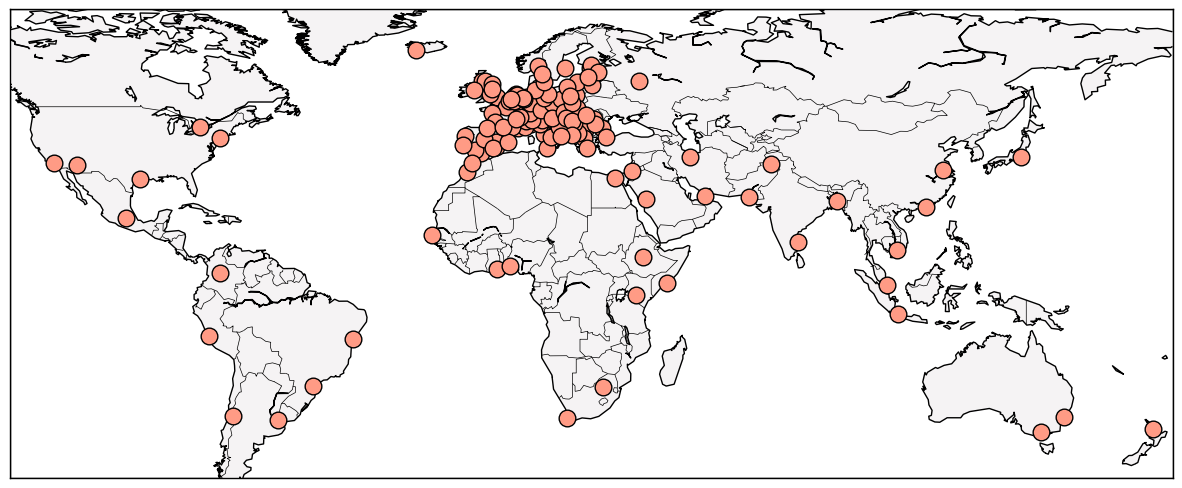

In [38]:
os.chdir(r'C:\Users\mduran\Desktop\PhD- Patterns and Dynamics in Urban Networks\1- DATA POLLUTION - Scaling laws, pdfs\RESULTS_GLOBAL')

fig, ax = plt.subplots(figsize=(15, 12))

m = Basemap(projection='cyl', llcrnrlat=-50, urcrnrlat=75, llcrnrlon=-130, urcrnrlon=180, resolution='c', ax=ax)

# Draw map details
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='#f5f3f4', lake_color='white')  # f2f2f2
m.drawmapboundary(fill_color='white')

def plot_cluster_cities(cluster_id, city_list, color):
    for city in city_list:
        if city in LATITUDE_MEANs_dic and city in LONGITUDE_MEANs_dic:
            x, y = m(LONGITUDE_MEANs_dic[city], LATITUDE_MEANs_dic[city])
            population = pop_T_NETWORK_dic.get(city, {'popu': np.array([1000000])})['popu'].sum()
            msize = 12 #get_marker_size(population)
            m.plot(x, y, 'o', markersize=msize, color=color, alpha=1, markeredgecolor='k')

for cluster_id, cities_sub in clusters.items():
    color = cluster_colors[cluster_id]
    plot_cluster_cities(cluster_id, cities_sub, color = '#ff9b85')


cluster_labels = [f'Cluster {cid}' for cid in sorted(cluster_colors.keys())]
cluster_colors_values = [cluster_colors[cid] for cid in sorted(cluster_colors.keys())]

# plt.savefig('City_Visualization_Map.svg', format='svg', dpi=600, bbox_inches='tight')

plt.show()

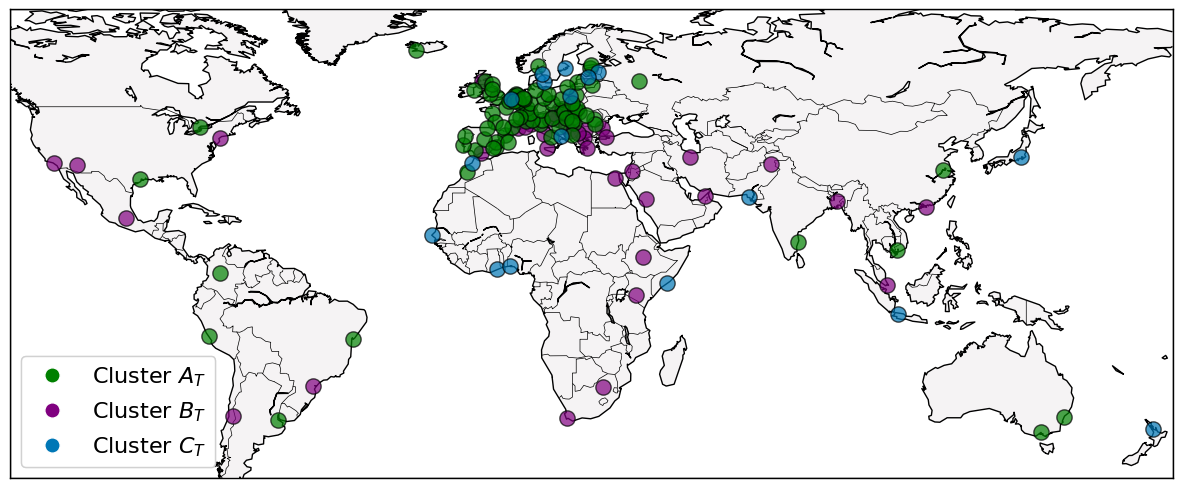

In [53]:
os.chdir(r'C:\Users\mduran\Desktop\PhD- Patterns and Dynamics in Urban Networks\1- DATA POLLUTION - Scaling laws, pdfs\RESULTS_GLOBAL')

fig, ax = plt.subplots(figsize=(15, 12))

m = Basemap(projection='cyl', llcrnrlat=-50, urcrnrlat=75, llcrnrlon=-130, urcrnrlon=180, resolution='c', ax=ax)

m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='#f5f3f4', lake_color='white')
m.drawmapboundary(fill_color='white')

def plot_cluster_cities(cluster_id, city_list, color):
    for city in city_list:
        if city in LATITUDE_MEANs_dic and city in LONGITUDE_MEANs_dic:
            x, y = m(LONGITUDE_MEANs_dic[city], LATITUDE_MEANs_dic[city])
            population = pop_T_NETWORK_dic.get(city, {'popu': np.array([1000000])})['popu'].sum()
            msize = 11
            m.plot(x, y, 'o', markersize=msize, color=color, alpha=0.7, markeredgecolor='k')

for cluster_id, cities_sub in clusters.items():
    color = cluster_colors[cluster_id]
    plot_cluster_cities(cluster_id, cities_sub, color)

city_size_legend = [
    Line2D([0], [0], marker='o', color='grey', label='Small city',
           markerfacecolor='none', markersize=6, linestyle='None', markeredgewidth=2),
    Line2D([0], [0], marker='o', color='grey', label='Medium city',
           markerfacecolor='none', markersize=10, linestyle='None', markeredgewidth=2),
    Line2D([0], [0], marker='o', color='grey', label='Large city',
           markerfacecolor='none', markersize=14, linestyle='None', markeredgewidth=2),
]
cluster_legend_elements = [
    Line2D([0], [0], marker='o', color='w', label=r"Cluster $A_T$",
           markerfacecolor=cluster_colors[2], markersize=11),
    Line2D([0], [0], marker='o', color='w', label=r"Cluster $B_T$",
           markerfacecolor=cluster_colors[1], markersize=11),
    Line2D([0], [0], marker='o', color='w', label=r"Cluster $C_T$",
           markerfacecolor=cluster_colors[3], markersize=11)
]

legend_clusters = ax.legend(handles=cluster_legend_elements, fontsize=16, loc='lower left')
ax.add_artist(legend_clusters)

# plt.savefig('City_Visualization_Map_Best_T'+T_type+'.svg', format='svg', dpi=600, bbox_inches='tight')

plt.show()
